### **MSc Selected Topics in Data Science (Machine Learning) Final Project**

### **Student Name: Mohammad Awad**

### Given a set of Images that describe the stage of dementia in Alzheimer patients. Each folder has a name that represents the label of the images inside it. according to the class label of dementia: Very Mild, Mild, moderate, None demented.

#### **1) Develop appropriate Artificial Neural Network model to predict the status of patient?**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np


In [ ]:
!unzip -q './Dementia_dataset.zip' -d './'

In [ ]:
#data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
data_dir = "/content/Dataset/"

# All images will be rescaled by 1./255.
gen = ImageDataGenerator( rescale = 1.0/128. )
datagen=gen.flow_from_directory(data_dir,class_mode='categorical',target_size=(128,128))


Found 6400 images belonging to 4 classes.


In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio(data_dir, output="Q2Data", seed=711, ratio=(.8, .2))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 6400 files [00:01, 6145.54 files/s]


In [ ]:
train_dir = "/content/Q2Data/train"   #Setting training directory
validation_dir = "/content/Q2Data/val"   #Setting testing directory

'''from tensorflow.keras.preprocessing.image import ImageDataGenerator 
bs=30         #Setting batch size
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator()
test_datagen  = ImageDataGenerator()

train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(180,180))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(128,128))'''


"from tensorflow.keras.preprocessing.image import ImageDataGenerator \nbs=30         #Setting batch size\n# All images will be rescaled by 1./255.\ntrain_datagen = ImageDataGenerator()\ntest_datagen  = ImageDataGenerator()\n\ntrain_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(180,180))\nvalidation_generator =  test_datagen.flow_from_directory(validation_dir,\n                                                         batch_size=bs,\n                                                         class_mode  = 'categorical',\n                                                         target_size=(128,128))"

In [ ]:
!ls ./Dataset


Mild_Demented  Moderate_Demented  Non_Demented	Very_Mild_Demented


In [ ]:
#read
t='Mild_Demented  Moderate_Demented  Non_Demented	Very_Mild_Demented'
labels =t.split()
img_size = 128
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data(train_dir)
val = get_data(validation_dir)


<ipython-input-7-66382b4ee6a0>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data'''
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


In [ ]:
ann = Sequential([
        Flatten(input_shape=(128,128,3)),
        Dense(3000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
160/160 [==============================] - 112s 686ms/step - loss: 1.1979 - accuracy: 0.4763
Epoch 2/5
160/160 [==============================] - 96s 599ms/step - loss: 0.9760 - accuracy: 0.5146
Epoch 3/5
160/160 [==============================] - 95s 595ms/step - loss: 0.9528 - accuracy: 0.5329
Epoch 4/5
160/160 [==============================] - 96s 600ms/step - loss: 0.9085 - accuracy: 0.5642
Epoch 5/5
160/160 [==============================] - 127s 792ms/step - loss: 0.8853 - accuracy: 0.5780


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_val)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_val, y_pred_classes))

41/41 [==============================] - 12s 298ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.02      0.03       180
           1       0.00      0.00      0.00        13
           2       0.69      0.78      0.74       640
           3       0.48      0.60      0.53       448

    accuracy                           0.60      1281
   macro avg       0.54      0.35      0.33      1281
weighted avg       0.66      0.60      0.56      1281



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
labels

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [ ]:
history = ann.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=4,
                    batch_size=20)

Epoch 1/4
256/256 [==============================] - 148s 577ms/step - loss: 0.8830 - accuracy: 0.5771 - val_loss: 0.8763 - val_accuracy: 0.5605
Epoch 2/4
256/256 [==============================] - 138s 539ms/step - loss: 0.8582 - accuracy: 0.5972 - val_loss: 0.8053 - val_accuracy: 0.6721
Epoch 3/4
256/256 [==============================] - 153s 596ms/step - loss: 0.8121 - accuracy: 0.6132 - val_loss: 0.8266 - val_accuracy: 0.5800
Epoch 4/4
256/256 [==============================] - 147s 576ms/step - loss: 0.7768 - accuracy: 0.6365 - val_loss: 0.7314 - val_accuracy: 0.6518


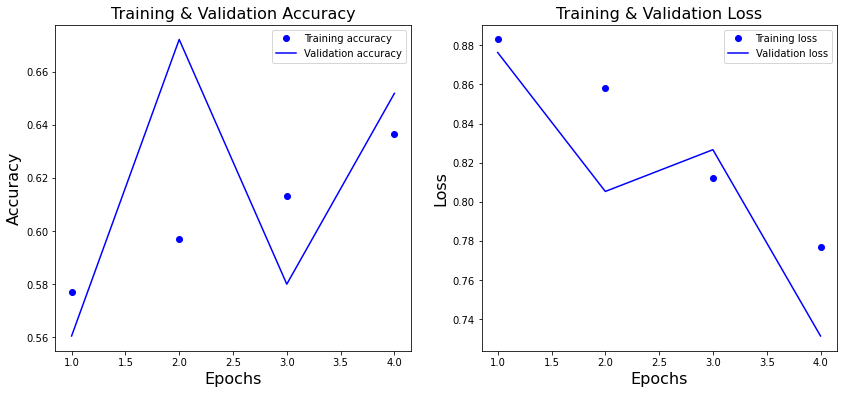

In [ ]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#### **2) Develop appropriate Deep Learning model using TensorFlow to predict the status of patient? Describe what type of deep learning did you use and Show the loss and accuracy curves?** 

Convoluted Neural Networks (CNN) were used for the deep learning task.

In [ ]:
from tensorflow.keras.layers import MaxPooling2D
cnn = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#The below results are very good

In [ ]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
160/160 [==============================] - 115s 714ms/step - loss: 0.9746 - accuracy: 0.5509
Epoch 2/5
160/160 [==============================] - 114s 712ms/step - loss: 0.5541 - accuracy: 0.7718
Epoch 3/5
160/160 [==============================] - 113s 705ms/step - loss: 0.2416 - accuracy: 0.9156
Epoch 4/5
160/160 [==============================] - 121s 755ms/step - loss: 0.0941 - accuracy: 0.9744
Epoch 5/5
160/160 [==============================] - 121s 756ms/step - loss: 0.0344 - accuracy: 0.9920


In [ ]:
cnn.evaluate(x_val,y_val)

41/41 [==============================] - 8s 192ms/step - loss: 0.0819 - accuracy: 0.9750


[0.08185982704162598, 0.9750195145606995]

In [ ]:
y_pred = cnn.predict(x_val)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_val, y_pred_classes))

41/41 [==============================] - 8s 193ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       180
           1       1.00      1.00      1.00        13
           2       0.95      1.00      0.98       640
           3       1.00      0.93      0.96       448

    accuracy                           0.98      1281
   macro avg       0.99      0.98      0.98      1281
weighted avg       0.98      0.98      0.97      1281



In [ ]:
labels

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [ ]:
y_pred = cnn.predict(x_val)
y_pred[:5]

41/41 [==============================] - 8s 192ms/step


array([[9.99233961e-01, 2.86617574e-08, 1.48859282e-04, 6.17155863e-04,
        2.93001567e-17, 2.77630826e-12, 1.26149102e-19, 6.03379177e-14,
        3.25710871e-15, 1.87758558e-14],
       [9.93496418e-01, 7.89671049e-08, 6.41207304e-03, 9.14939228e-05,
        1.29425487e-18, 7.16709840e-13, 2.13898971e-20, 6.40643137e-14,
        7.61371182e-16, 9.86946866e-15],
       [9.92951870e-01, 1.25209951e-07, 5.83898276e-03, 1.20902678e-03,
        3.06982025e-16, 2.26808836e-10, 4.30223585e-18, 1.86740662e-12,
        1.34628094e-14, 5.85770419e-13],
       [9.95372951e-01, 3.63217737e-07, 4.56810556e-03, 5.85918424e-05,
        9.68701355e-17, 6.02722169e-12, 1.99610862e-18, 1.05689416e-12,
        5.86526482e-15, 5.79213056e-13],
       [9.98987436e-01, 4.88047817e-07, 1.47271479e-04, 8.64729169e-04,
        1.32639807e-18, 4.87175144e-12, 2.76959908e-20, 1.57265336e-15,
        9.56437509e-18, 6.26788753e-15]], dtype=float32)

In [ ]:
history = cnn.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=4,
                    batch_size=30)

Epoch 1/4
171/171 [==============================] - 134s 777ms/step - loss: 0.9440 - accuracy: 0.5667 - val_loss: 0.7655 - val_accuracy: 0.6729
Epoch 2/4
171/171 [==============================] - 122s 712ms/step - loss: 0.5426 - accuracy: 0.7826 - val_loss: 0.4056 - val_accuracy: 0.8345
Epoch 3/4
171/171 [==============================] - 121s 706ms/step - loss: 0.2250 - accuracy: 0.9172 - val_loss: 0.2395 - val_accuracy: 0.9118
Epoch 4/4
171/171 [==============================] - 120s 705ms/step - loss: 0.0943 - accuracy: 0.9740 - val_loss: 0.1032 - val_accuracy: 0.9703


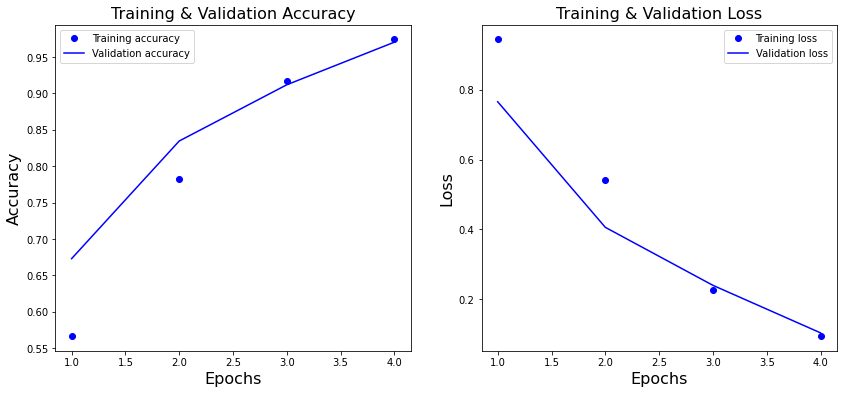

In [ ]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

Great performance achieved, could add more dropout between layers to avoid overfitting

In [ ]:
#an aditional experiment
'''

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(128,128,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(4, activation="softmax"))

model.summary()
'''

'\n\nmodel = Sequential()\nmodel.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(128,128,3)))\nmodel.add(MaxPool2D())\n\nmodel.add(Conv2D(32, 3, padding="same", activation="relu"))\nmodel.add(MaxPool2D())\n\nmodel.add(Conv2D(64, 3, padding="same", activation="relu"))\nmodel.add(MaxPool2D())\nmodel.add(Dropout(0.4))\n\nmodel.add(Flatten())\nmodel.add(Dense(128,activation="relu"))\nmodel.add(Dense(4, activation="softmax"))\n\nmodel.summary()\n'

In [ ]:
'''
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
'''

"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\nepochs_range = range(50)\n\nplt.figure(figsize=(15, 15))\nplt.subplot(2, 2, 1)\nplt.plot(epochs_range, acc, label='Training Accuracy')\nplt.plot(epochs_range, val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(2, 2, 2)\nplt.plot(epochs_range, loss, label='Training Loss')\nplt.plot(epochs_range, val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()\n"

#### **3) What are the parameters that you used to configure your model; describe how did you tune your module?**

used the number of filters on the input and hidden layers, and set activation as relu, tuning could be done by changing the above parameters one by one and adding and removing layers subject to long training time and limited resources.

A guide by analyticsvidhya was followed to reach the above results

#### **4) Can we apply LSTM and GAN for such problems, explain your answer with evidence?**

Yes we can, as these models have a discriminating component.

 Below links are for researchers stating the fact.

https://www.researchgate.net/post/Can_we_apply_LSTM_model_for_image_classification#:~:text=Yes%2C%20the%20LSTM%20model%20can%20be%20applied%20for%20image%20classification.

https://www.researchgate.net/post/Can_we_use_Generative_adversarial_network_GAN_for_image_classification